In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from scipy.stats import zscore

In [73]:
data = pd.read_csv("c:/Users/kkhan/OneDrive/Documents/GitHub/Celebal_Internship_07_14892/dataset/Housepp/train.csv")

In [74]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [75]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [76]:
data.drop(columns=['Id'], inplace=True)

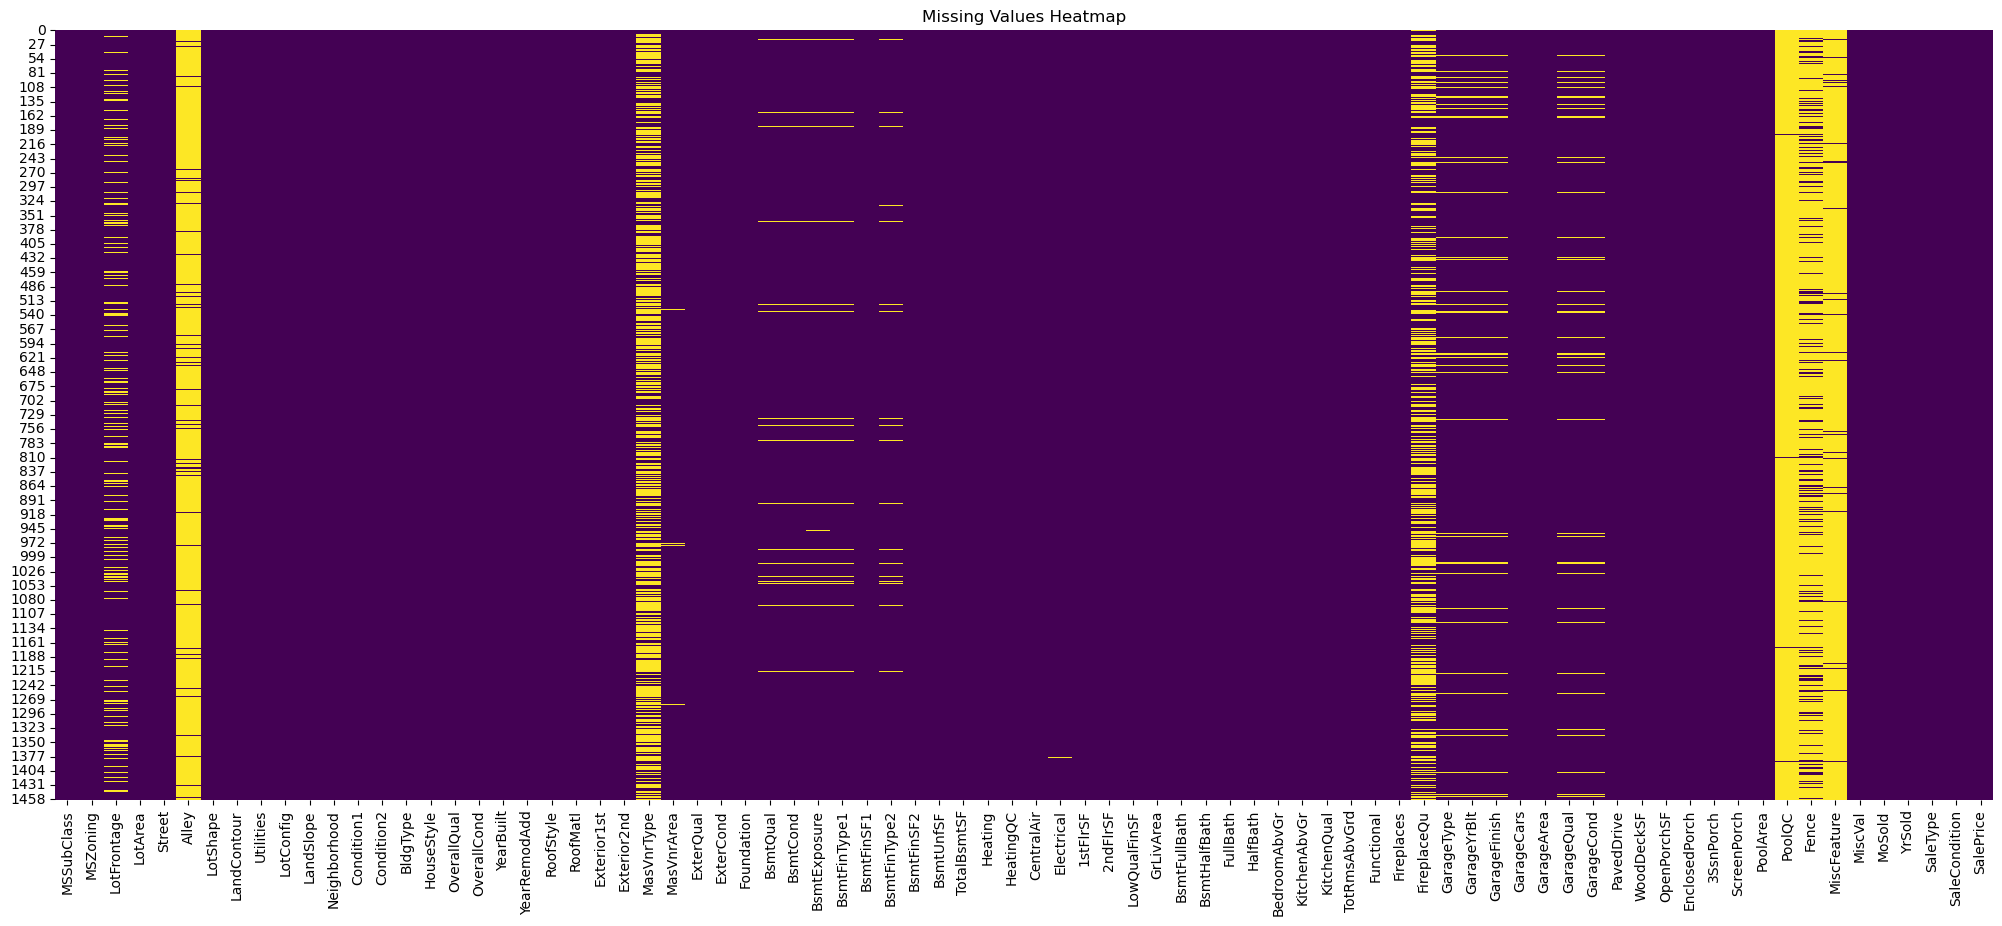

In [77]:
plt.figure(figsize=(25, 10))
sns.heatmap(data.isnull(), cbar = False, cmap= 'viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [78]:
print("Total missing values in the dataset:", data.isnull().sum().sum())
print("Percentage of missing values in the dataset:", (data.isnull().sum().sum() / data.size) * 100)
print("Columns with missing values:", data.columns[data.isnull().any()].tolist())

Total missing values in the dataset: 7829
Percentage of missing values in the dataset: 6.70291095890411
Columns with missing values: ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [79]:
data.columns[data.isnull().any()].shape

(19,)

In [80]:
for col in data.columns[data.isnull().any()]:

    print(f"Column: {col}, Missing Values: {data[col].isnull().sum()}, Percentage: {(data[col].isnull().sum() / len(data)) * 100:.2f}%")

Column: LotFrontage, Missing Values: 259, Percentage: 17.74%
Column: Alley, Missing Values: 1369, Percentage: 93.77%
Column: MasVnrType, Missing Values: 872, Percentage: 59.73%
Column: MasVnrArea, Missing Values: 8, Percentage: 0.55%
Column: BsmtQual, Missing Values: 37, Percentage: 2.53%
Column: BsmtCond, Missing Values: 37, Percentage: 2.53%
Column: BsmtExposure, Missing Values: 38, Percentage: 2.60%
Column: BsmtFinType1, Missing Values: 37, Percentage: 2.53%
Column: BsmtFinType2, Missing Values: 38, Percentage: 2.60%
Column: Electrical, Missing Values: 1, Percentage: 0.07%
Column: FireplaceQu, Missing Values: 690, Percentage: 47.26%
Column: GarageType, Missing Values: 81, Percentage: 5.55%
Column: GarageYrBlt, Missing Values: 81, Percentage: 5.55%
Column: GarageFinish, Missing Values: 81, Percentage: 5.55%
Column: GarageQual, Missing Values: 81, Percentage: 5.55%
Column: GarageCond, Missing Values: 81, Percentage: 5.55%
Column: PoolQC, Missing Values: 1453, Percentage: 99.52%
Column

In [81]:
data.drop(columns=["Alley", "PoolQC", "Fence", "MiscFeature","FireplaceQu","MasVnrType"], inplace=True)

In [82]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [83]:
data["LotFrontage"].fillna(data["LotFrontage"].mean(), inplace=True)

C:\Users\kkhan\AppData\Local\Temp\ipykernel_24680\3070194591.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["LotFrontage"].fillna(data["LotFrontage"].mean(), inplace=True)


In [84]:
data.isna().sum().sum()

601

In [85]:
low_missing_cols = data.columns[data.isnull().mean() < 0.06]

for col in low_missing_cols:
    if data[col].dtype in ['int64', 'float64']:
        data[col].fillna(data[col].median(), inplace=True)

for col in low_missing_cols:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)



C:\Users\kkhan\AppData\Local\Temp\ipykernel_24680\178339564.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\kkhan\AppData\Local\Temp\ipykernel_24680\178339564.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [86]:
data.isna().sum().sum()

0

In [87]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


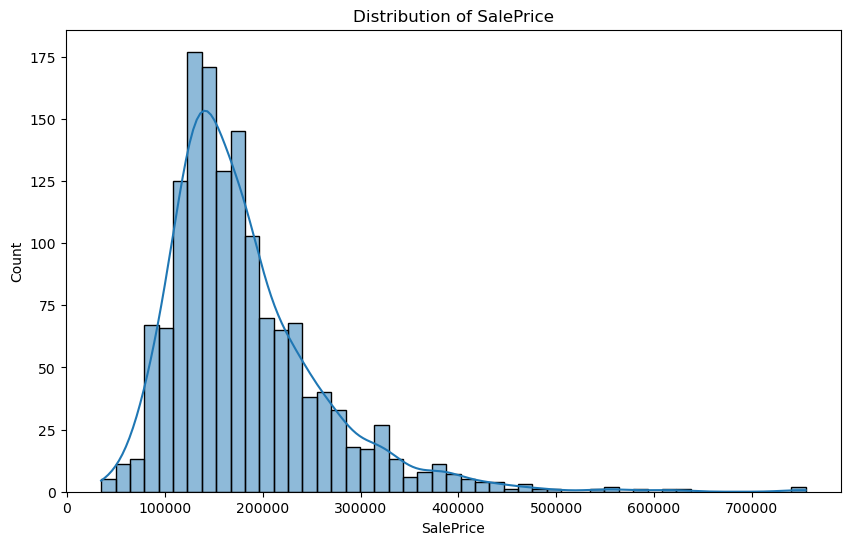

In [88]:
plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.show()


In [89]:
data.select_dtypes(include=[np.number]).columns.shape


(37,)

In [90]:
data_corr = data.corr(numeric_only=True)

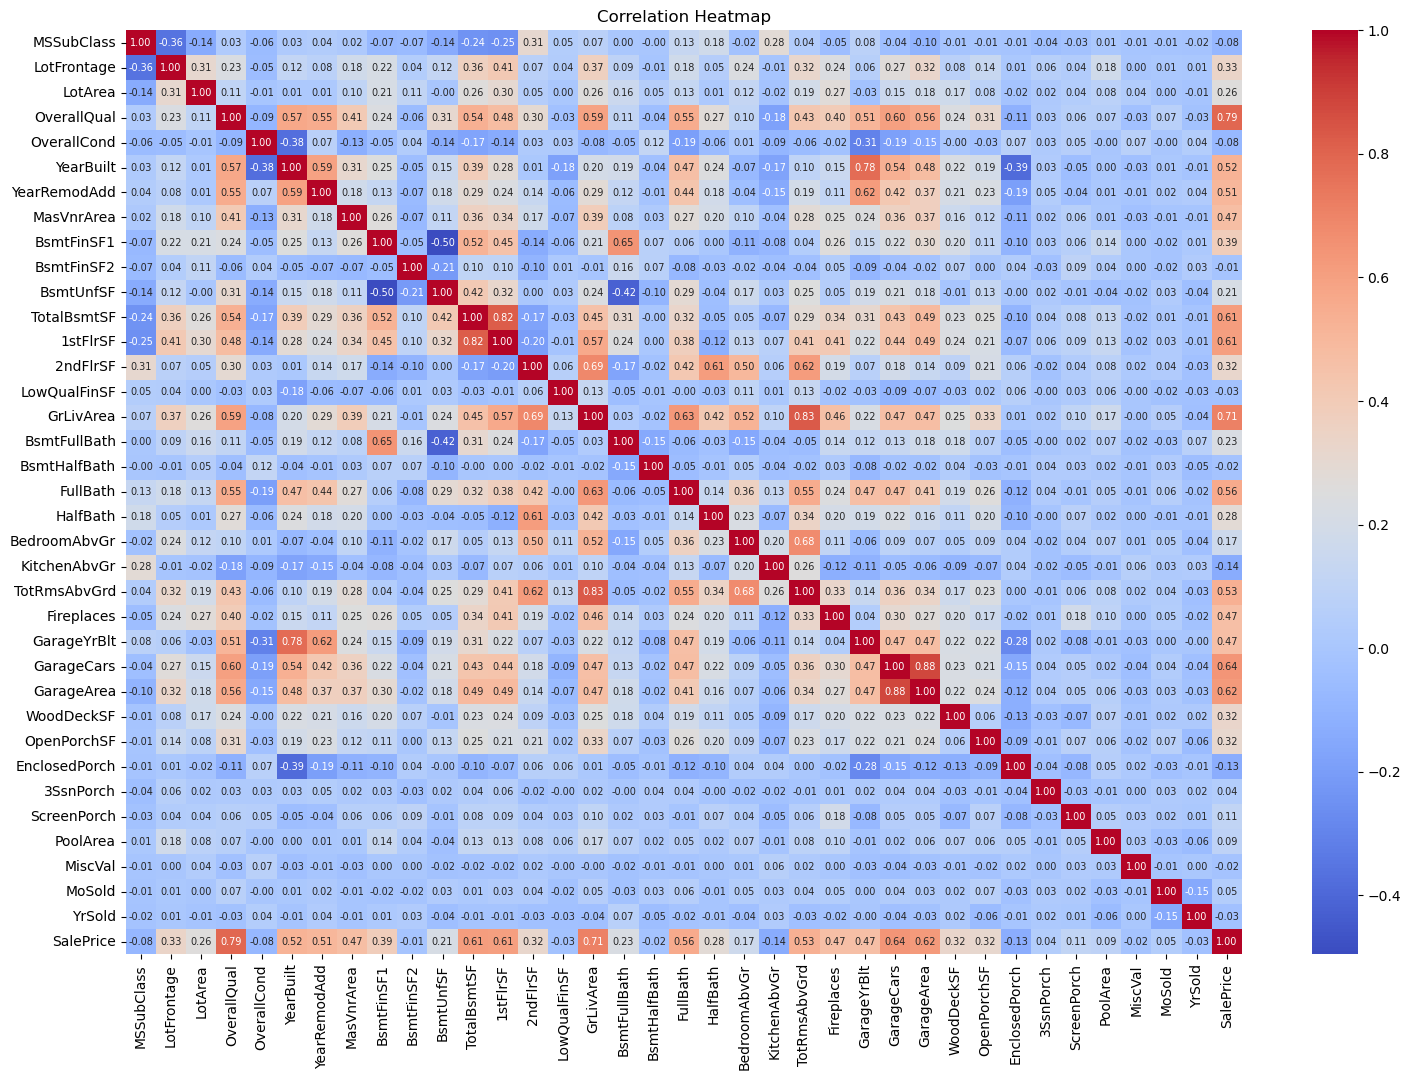

In [91]:
plt.figure(figsize=(18, 12))
sns.heatmap(data_corr, annot=True, cmap='coolwarm', annot_kws={"size":7}, fmt=".2f" )
plt.title('Correlation Heatmap')
plt.show()


In [92]:
selected_features = data_corr[abs(data_corr['SalePrice'] > 0.2)].index.tolist()


In [93]:
refined_numeric_data = data[selected_features]
refined_numeric_data

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,65.0,8450,7,2003,2003,196.0,706,150,856,856,...,2,1,8,0,2003.0,2,548,0,61,208500
1,80.0,9600,6,1976,1976,0.0,978,284,1262,1262,...,2,0,6,1,1976.0,2,460,298,0,181500
2,68.0,11250,7,2001,2002,162.0,486,434,920,920,...,2,1,6,1,2001.0,2,608,0,42,223500
3,60.0,9550,7,1915,1970,0.0,216,540,756,961,...,1,0,7,1,1998.0,3,642,0,35,140000
4,84.0,14260,8,2000,2000,350.0,655,490,1145,1145,...,2,1,9,1,2000.0,3,836,192,84,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,1999,2000,0.0,0,953,953,953,...,2,1,7,1,1999.0,2,460,0,40,175000
1456,85.0,13175,6,1978,1988,119.0,790,589,1542,2073,...,2,0,7,2,1978.0,2,500,349,0,210000
1457,66.0,9042,7,1941,2006,0.0,275,877,1152,1188,...,2,0,9,2,1941.0,1,252,0,60,266500
1458,68.0,9717,5,1950,1996,0.0,49,0,1078,1078,...,1,0,5,0,1950.0,1,240,366,0,142125


In [94]:
char_data = data[data.select_dtypes(include=("object")).columns]
char_data

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [95]:
def categorical_encoding(dataframe):

    ordinal_mappings = {
    'LotShape': {'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3},
    'LandSlope': {'Sev': 0, 'Mod': 1, 'Gtl': 2},
    'ExterQual': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'ExterCond': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'BsmtQual': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'BsmtCond': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3},
    'BsmtExposure': {'No': 0, 'Mn': 1, 'Av': 2, 'Gd': 3},
    'BsmtFinType1': {'Unf': 0, 'LwQ': 1, 'Rec': 2, 'BLQ': 3, 'ALQ': 4, 'GLQ': 5},
    'BsmtFinType2': {'Unf': 0, 'LwQ': 1, 'Rec': 2, 'BLQ': 3, 'ALQ': 4, 'GLQ': 5},
    'HeatingQC': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'KitchenQual': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'Functional': {'Sal': 0, 'Sev': 1, 'Maj2': 2, 'Maj1': 3, 'Mod': 4, 'Min2': 5, 'Min1': 6, 'Typ': 7},
    'GarageFinish': {'Unf': 0, 'RFn': 1, 'Fin': 2},
    'GarageQual': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'GarageCond': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'PavedDrive': {'N': 0, 'P': 1, 'Y': 2}
}


    ordinal_cols = list(ordinal_mappings.keys())

    nominal_cols = [
        'MSZoning', 'Street', 'LandContour', 'Utilities', 'LotConfig',
        'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation',
        'Heating', 'CentralAir', 'Electrical', 'GarageType', 'SaleType', 'SaleCondition'
    ]

    for col in ordinal_cols:
        if col in dataframe.columns:
            dataframe[col] = dataframe[col].map(ordinal_mappings[col])

    encoded_data = pd.get_dummies(dataframe, columns=[col for col in nominal_cols if col in dataframe.columns], drop_first=True, dtype='int')

    return encoded_data

In [96]:
refined_categorical_data = categorical_encoding(char_data)
refined_categorical_data

C:\Users\kkhan\AppData\Local\Temp\ipykernel_24680\1503867800.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col] = dataframe[col].map(ordinal_mappings[col])
C:\Users\kkhan\AppData\Local\Temp\ipykernel_24680\1503867800.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col] = dataframe[col].map(ordinal_mappings[col])
C:\Users\kkhan\AppData\Local\Temp\ipykernel_24680\1503867800.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,3,2,3,2,3,2,0,5,0,4,...,0,0,0,0,1,0,0,0,1,0
1,3,2,2,2,3,2,3,4,0,4,...,0,0,0,0,1,0,0,0,1,0
2,2,2,3,2,3,2,1,5,0,4,...,0,0,0,0,1,0,0,0,1,0
3,2,2,2,2,2,3,0,4,0,3,...,0,0,0,0,1,0,0,0,0,0
4,2,2,3,2,3,2,2,5,0,4,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,2,2,2,3,2,0,0,0,4,...,0,0,0,0,1,0,0,0,1,0
1456,3,2,2,2,3,2,0,4,2,2,...,0,0,0,0,1,0,0,0,1,0
1457,3,2,4,3,2,3,0,5,0,4,...,0,0,0,0,1,0,0,0,1,0
1458,3,2,2,2,2,2,1,5,2,3,...,0,0,0,0,1,0,0,0,1,0


In [122]:
y_train = refined_numeric_data['SalePrice']
refined_numeric_data.drop(columns=['SalePrice'])

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,BsmtFullBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
0,65.0,8450,7,2003,2003,196.0,706,150,856,856,...,1,2,1,8,0,2003.0,2,548,0,61
1,80.0,9600,6,1976,1976,0.0,978,284,1262,1262,...,0,2,0,6,1,1976.0,2,460,298,0
2,68.0,11250,7,2001,2002,162.0,486,434,920,920,...,1,2,1,6,1,2001.0,2,608,0,42
3,60.0,9550,7,1915,1970,0.0,216,540,756,961,...,1,1,0,7,1,1998.0,3,642,0,35
4,84.0,14260,8,2000,2000,350.0,655,490,1145,1145,...,1,2,1,9,1,2000.0,3,836,192,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,1999,2000,0.0,0,953,953,953,...,0,2,1,7,1,1999.0,2,460,0,40
1456,85.0,13175,6,1978,1988,119.0,790,589,1542,2073,...,1,2,0,7,2,1978.0,2,500,349,0
1457,66.0,9042,7,1941,2006,0.0,275,877,1152,1188,...,0,2,0,9,2,1941.0,1,252,0,60
1458,68.0,9717,5,1950,1996,0.0,49,0,1078,1078,...,1,1,0,5,0,1950.0,1,240,366,0


In [123]:
refined_data = pd.concat([refined_numeric_data, refined_categorical_data], axis=1)

In [124]:
refined_data

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,2003,2003,196.0,706,150,856,856,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,1976,1976,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,2001,2002,162.0,486,434,920,920,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,1915,1970,0.0,216,540,756,961,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,2000,2000,350.0,655,490,1145,1145,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,1999,2000,0.0,0,953,953,953,...,0,0,0,0,1,0,0,0,1,0
1456,85.0,13175,6,1978,1988,119.0,790,589,1542,2073,...,0,0,0,0,1,0,0,0,1,0
1457,66.0,9042,7,1941,2006,0.0,275,877,1152,1188,...,0,0,0,0,1,0,0,0,1,0
1458,68.0,9717,5,1950,1996,0.0,49,0,1078,1078,...,0,0,0,0,1,0,0,0,1,0


In [125]:
y_train

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

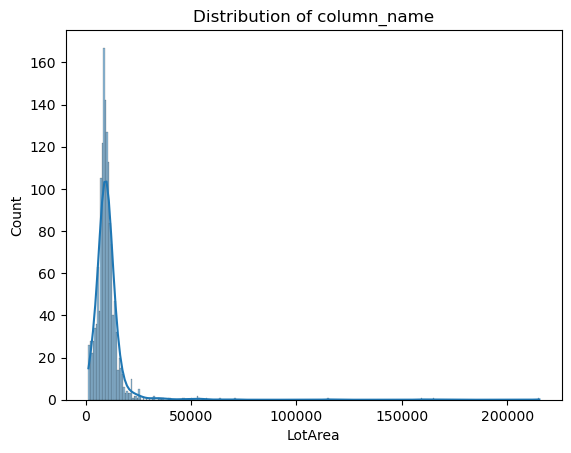

In [126]:
sns.histplot(refined_data['LotArea'], kde=True)
plt.title("Distribution of column_name")
plt.show()
# Can't apply z-score as it is not normally distributed 

In [127]:
"""from scipy.stats import skew


def remove_outliers(dataframe, skew_thresh=1, z_thresh=3, iqr_factor=1.5, log_transform=False):
    
    num_data = dataframe.select_dtypes(include=[np.number])

    for col in num_data.columns:
        col_skew = skew(dataframe[col].dropna())

        if abs(col_skew) <= skew_thresh:
            # Use Z-score
            z_scores = np.abs(zscore(dataframe[col].fillna(0)))
            dataframe = dataframe[z_scores < z_thresh]
        else:
            # Use IQR (with optional log transform)
            temp_col = np.log1p(dataframe[col]) if log_transform else dataframe[col]
            Q1 = temp_col.quantile(0.25)
            Q3 = temp_col.quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - iqr_factor * IQR
            upper = Q3 + iqr_factor * IQR
            dataframe = dataframe[(temp_col >= lower) & (temp_col <= upper)]

    return dataframe"""


'from scipy.stats import skew\n\n\ndef remove_outliers(dataframe, skew_thresh=1, z_thresh=3, iqr_factor=1.5, log_transform=False):\n    \n    num_data = dataframe.select_dtypes(include=[np.number])\n\n    for col in num_data.columns:\n        col_skew = skew(dataframe[col].dropna())\n\n        if abs(col_skew) <= skew_thresh:\n            # Use Z-score\n            z_scores = np.abs(zscore(dataframe[col].fillna(0)))\n            dataframe = dataframe[z_scores < z_thresh]\n        else:\n            # Use IQR (with optional log transform)\n            temp_col = np.log1p(dataframe[col]) if log_transform else dataframe[col]\n            Q1 = temp_col.quantile(0.25)\n            Q3 = temp_col.quantile(0.75)\n            IQR = Q3 - Q1\n            lower = Q1 - iqr_factor * IQR\n            upper = Q3 + iqr_factor * IQR\n            dataframe = dataframe[(temp_col >= lower) & (temp_col <= upper)]\n\n    return dataframe'

In [128]:
"Cleaned_data = remove_outliers(refined_data, skew_thresh=1, z_thresh=3, iqr_factor=1.5, log_transform=False)"

'Cleaned_data = remove_outliers(refined_data, skew_thresh=1, z_thresh=3, iqr_factor=1.5, log_transform=False)'

In [133]:
def standardize_data(dataframe):
    scaler = StandardScaler()
    standardized_array = scaler.fit_transform(dataframe)
    standardized_data = pd.DataFrame(standardized_array, columns=dataframe.columns, index=dataframe.index)
    return standardized_data


In [135]:
standardized_data =  standardize_data(refined_data)
standardized_data

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.229372,-0.207142,0.651479,1.050994,0.878668,0.514104,0.575425,-0.944591,-0.459303,-0.793434,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,0.451936,-0.091886,-0.071836,0.156734,-0.429577,-0.570750,1.171992,-0.641228,0.466465,0.257140,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,-0.093110,0.073480,0.651479,0.984752,0.830215,0.325915,0.092907,-0.301643,-0.313369,-0.627826,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,-0.456474,-0.096897,0.651479,-1.863632,-0.720298,-0.570750,-0.499274,-0.061670,-0.687324,-0.521734,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,0.633618,0.375148,1.374795,0.951632,0.733308,1.366489,0.463568,-0.174865,0.199680,-0.045611,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.365633,-0.260560,-0.071836,0.918511,0.733308,-0.570750,-0.973018,0.873321,-0.238122,-0.542435,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1456,0.679039,0.266407,-0.071836,0.222975,0.151865,0.087911,0.759659,0.049262,1.104925,2.355701,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1457,-0.183951,-0.147810,0.651479,-1.002492,1.024029,-0.570750,-0.369871,0.701265,0.215641,0.065656,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1458,-0.093110,-0.080160,-0.795151,-0.704406,0.539493,-0.570750,-0.865548,-1.284176,0.046905,-0.218982,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [137]:
X_train =  standardized_data

In [ ]:
numeric_cols = X_train.select_dtypes(include='number').columns
correlations = pd.DataFrame(X_train[numeric_cols].corrwith(y_train), columns=['Correlation']).sort_values(by='Correlation', ascending=False)

print(correlations.))

              Correlation
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
ExterQual        0.682639
KitchenQual      0.659600
BsmtQual         0.650138
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
GarageFinish     0.537242
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
